<a href="https://colab.research.google.com/github/ashfaqjani916/Cypher-Link/blob/main/DU2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score, balanced_accuracy_score, average_precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier ,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from datetime import date
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ks-projects-201801.csv')

In [ ]:
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15.0,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,1283.0,19500.00


In [ ]:
# Variable Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232120 entries, 0 to 232119
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                232120 non-null  int64  
 1   name              232119 non-null  object 
 2   category          232119 non-null  object 
 3   main_category     232119 non-null  object 
 4   currency          232119 non-null  object 
 5   deadline          232119 non-null  object 
 6   goal              232119 non-null  float64
 7   launched          232119 non-null  object 
 8   pledged           232119 non-null  float64
 9   state             232119 non-null  object 
 10  backers           232119 non-null  float64
 11  country           232119 non-null  object 
 12  usd pledged       229797 non-null  float64
 13  usd_pledged_real  232119 non-null  float64
 14  usd_goal_real     232119 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 26.6+ MB


In [ ]:
# Getting dimensions of dataset

df.shape

(232120, 15)

In [ ]:
# Taking column names to use them later

categories = df.main_category.unique()
categories

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', nan], dtype=object)

In [ ]:
# Getting column value types

df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [ ]:
# Getting short summary statistics of columns

df.describe().round(2)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,2.321200e+05,2.321190e+05,232119.00,232119.00,229797.00,232119.00,2.321190e+05
mean,1.394114e+09,4.838088e+04,9588.64,105.29,6938.67,8949.14,4.506768e+04
std,5.628531e+08,1.193872e+06,94904.91,956.60,78229.68,88182.05,1.190670e+06
min,1.852000e+04,5.000000e-01,0.00,0.00,0.00,0.00,4.900000e-01
25%,1.161728e+09,2.000000e+03,30.00,2.00,16.81,31.00,2.000000e+03
50%,1.489611e+09,5.040000e+03,620.00,12.00,392.92,625.00,5.457750e+03
75%,1.817638e+09,1.600000e+04,4085.00,56.00,3031.00,4052.00,1.550000e+04
max,2.147476e+09,1.000000e+08,20338986.27,219382.00,20338986.27,20338986.27,1.663614e+08


In [ ]:
# Checking for Null values

for each in df.columns:
    print(f'{each}: ',any(df[f'{each}'].isnull()))


ID:  False
name:  True
category:  True
main_category:  True
currency:  True
deadline:  True
goal:  True
launched:  True
pledged:  True
state:  True
backers:  True
country:  True
usd pledged:  True
usd_pledged_real:  True
usd_goal_real:  True


In [ ]:
# Null values in a column 'name'

df[df['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1.0,US,100.0,100.0,200000.0


In [ ]:
# Null values in a column 'usd pledged'

df[df['usd pledged'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0.0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0.0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0.0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0.0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0.0,"N,0""",NaN,3660.38,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231712,247730811,The Tudor Deck,Film & Video,Film & Video,USD,2015-03-11,5000.0,2015-02-10 20:43:19,160.00,undefined,0.0,"N,0""",NaN,160.00,5000.00
231724,247793374,The First light,Film & Video,Film & Video,AUD,2015-03-04,10000.0,2015-01-23 17:43:59,18.00,undefined,0.0,"N,0""",NaN,14.11,7836.38
231796,248203990,A Different kind Of Music Project,Music,Music,USD,2015-09-02,2000.0,2015-08-19 18:55:07,0.00,undefined,0.0,"N,0""",NaN,0.00,2000.00
231923,248869612,COME HOME - Debut Album from Composer Rob Teehan,Music,Music,CAD,2014-12-22,5000.0,2014-11-20 20:23:12,5772.00,undefined,0.0,"N,0""",NaN,4979.30,4313.32


In [ ]:
# highest backed product
high = df.loc[df['usd_pledged_real'].idxmax()]
high

ID                                                        1799979574
name                Pebble Time - Awesome Smartwatch, No Compromises
category                                              Product Design
main_category                                                 Design
currency                                                         USD
deadline                                                  2015-03-28
goal                                                        500000.0
launched                                         2015-02-24 15:44:42
pledged                                                  20338986.27
state                                                     successful
backers                                                      78471.0
country                                                           US
usd pledged                                              20338986.27
usd_pledged_real                                         20338986.27
usd_goal_real                     

In [ ]:
# least supported product
df7 =df
df7 = df7[(df7.goal > 1)].sort_values('usd_pledged_real')
low = df7.loc[df7['usd_pledged_real'].idxmin()]
low

ID                                       1000002330
name                The Songs of Adelaide & Abullah
category                                     Poetry
main_category                            Publishing
currency                                        GBP
deadline                                 2015-10-09
goal                                         1000.0
launched                        2015-08-11 12:12:28
pledged                                         0.0
state                                        failed
backers                                         0.0
country                                          GB
usd pledged                                     0.0
usd_pledged_real                                0.0
usd_goal_real                               1533.95
Name: 0, dtype: object

In [ ]:
# finding the outliers
new_df = pd.DataFrame()
df8 = df[['usd_pledged_real', 'usd_goal_real']]
for i,j in enumerate(df8.columns):
    Q1 = np.percentile( df8[j], 25)
    Q3 = np.percentile( df8[j], 75)

    # 2.
    Q1,Q3 = np.percentile(df8[j] , [25,75])

    # Find IQR, upper limit, lower limit
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    # Find outliers
    outliers = df8[j][(df8[j] > ul) | (df8[j] < ll)]
    #new_df = new_df.append(outliers, ignore_index=True)
    new_df = pd.concat([new_df, pd.DataFrame([outliers])], ignore_index=True)




new_df = new_df.T
new_df.columns = df8.columns

In [ ]:
new_df.describe()

,usd_pledged_real,usd_goal_real
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


<Axes: ylabel='usd_goal_real'>

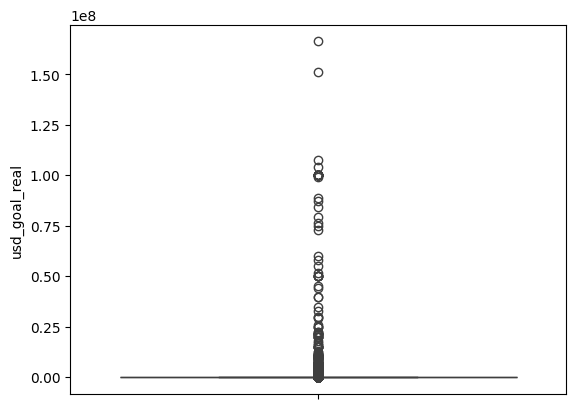

In [ ]:
# Plotting the box plots to check outliers
sns.boxplot(df['usd_goal_real'])

<Axes: ylabel='usd_pledged_real'>

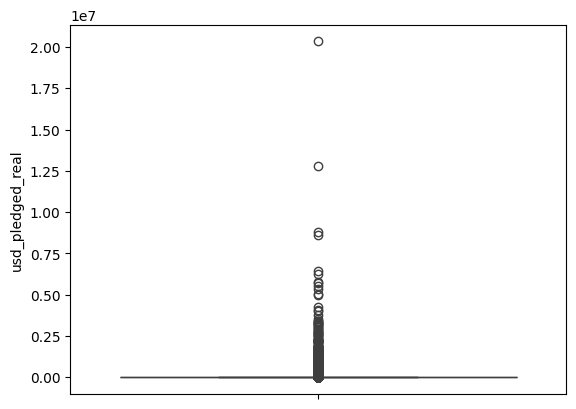

In [ ]:
# plotting bix plot
sns.boxplot(df['usd_pledged_real'])

In [ ]:
variable = 'state'

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))

In [ ]:
temp_pie = pie_chart[:4]
temp_pie[3] = pie_chart[3:6].sum()
temp_pie = temp_pie.rename(index= {'undefined' : 'others'})
temp_pie.name = ''

In [ ]:
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('state', inplace=True)
output = output.rename(columns = {'state': 'Number'})

,Number,Share
state,,
failed,121083,52.16%
successful,82268,35.44%
canceled,23755,10.23%
undefined,2179,0.94%
live,1710,0.74%
suspended,1124,0.48%


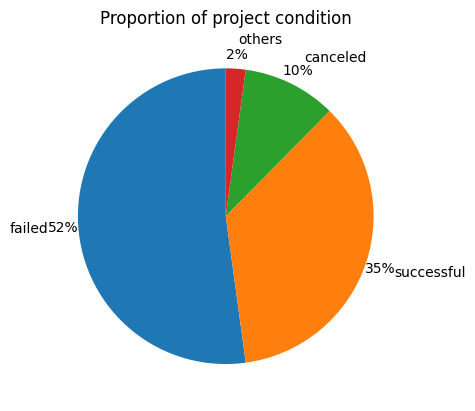

In [ ]:
#pie_chart.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
temp_pie.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Proportion of project condition')
output

In [ ]:
variable = "main_category"

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))

In [ ]:
output
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('Main Category', inplace=True)
output = output.rename(columns = {'main_category': 'Number'})

,Number,Share
Main Category,,
Film & Video,39087,16.84%
Music,31797,13.70%
Publishing,24511,10.56%
Games,21667,9.33%
Technology,19787,8.52%
Design,18486,7.96%
Art,17264,7.44%
Food,15134,6.52%
Fashion,13856,5.97%


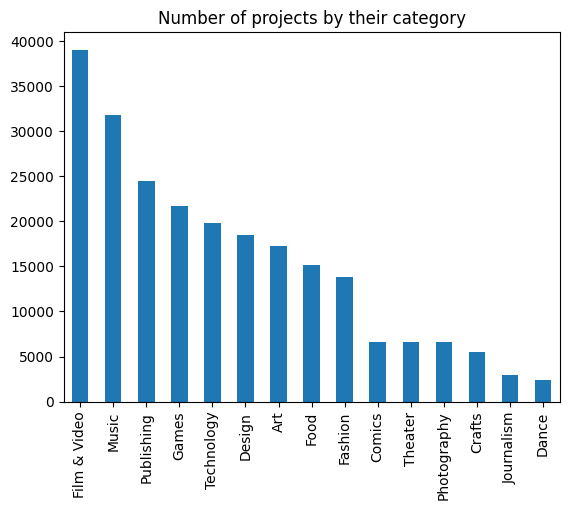

In [ ]:
pie_chart.plot(kind = "bar")
plt.title('Number of projects by their category')
output

In [ ]:
variable = 'currency'

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))

In [ ]:
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('Currency types', inplace=True)
output = output.rename(columns = {'currency': 'Number of project'})

,Number of project,Share
Currency types,,
USD,181061,78.00%
GBP,20890,9.00%
EUR,10695,4.61%
CAD,9246,3.98%
AUD,4848,2.09%
SEK,1073,0.46%
MXN,1068,0.46%
NZD,876,0.38%
DKK,687,0.30%


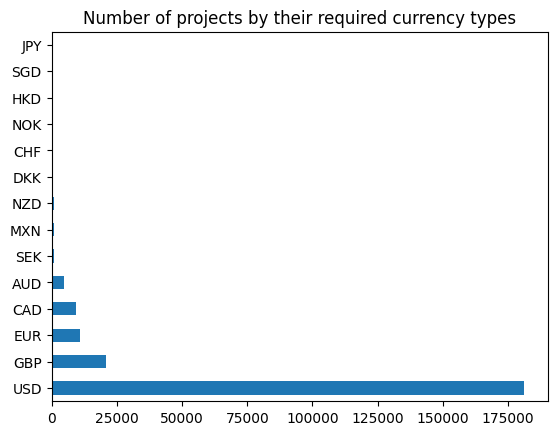

In [ ]:
pie_chart.plot(kind = "barh")
plt.title('Number of projects by their required currency types')

output


In [ ]:
temp_df = df[df['country'] != 'N,0"']

variable = 'country'
output = pd.DataFrame((temp_df[variable].value_counts()))

In [ ]:
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('Currency types', inplace=True)
output = output.rename(columns = {'currency': 'Number of project'})

In [ ]:
temp = output.copy(deep=True)
temp_output = temp[:6]
temp_output.iloc[5] = temp[5:].sum()
temp_output = temp_output.rename(index= {'FR' : 'Others'})

temp_output

,country,Share
Currency types,,
US,179384,78.06%
GB,20598,8.96%
CA,9120,3.97%
AU,4783,2.08%
DE,2536,1.10%
Others,13376,0.78%0.78%0.76%0.62%0.46%0.46%0.37%0.29%0.22%0...


In [ ]:
output['Share'] = output['Share'].map("{:,.2f}%".format)


ValueError: Unknown format code 'f' for object of type 'str'

In [ ]:
#temp_output['Share'] = temp_output['Share'].map("{:,.2f}%".format)
temp_output.Share.name = ''
temp_output

,country,Share
Currency types,,
US,179384,78.06%
GB,20598,8.96%
CA,9120,3.97%
AU,4783,2.08%
DE,2536,1.10%
Others,13376,0.78%0.78%0.76%0.62%0.46%0.46%0.37%0.29%0.22%0...


In [ ]:
temp_output.Share.plot(kind = "pie",  autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Number of projects by their countries')

output

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# Dropping unknown values in a column 'country'
total_df = df[df['country'] != 'N,0"']
total_df.shape

(229798, 25)

In [ ]:
# Groupping number of all projects by their categories and countries

tdf = total_df.pivot_table('state', index='country', columns = 'main_category', aggfunc='count', margins =True)
tdf

In [ ]:
# Groupping number of ONLY SUCCESSFULL projects by their categories and countries
# NaN values mean that there is no any successfull project of a category A in country B

success_df = total_df.query('state == "successful"')
sdf = success_df.pivot_table('state', index='country', columns = 'main_category', aggfunc='count', margins =True)
sdf


NameError: name 'total_df' is not defined

In [ ]:
# Calculating success rate of projects by their categories and countries
#from pandas.plotting.table import table

success_rate = (sdf/tdf*100).round(decimals = 2)
success_rate

In [ ]:
# Rate of being not succesfull ( undefined, failed, suspended, cancelled, live  )

100 - success_rate

In [ ]:
# Plotting Success rate of each category across countries

for i in range(success_rate.shape[1]-1):
    plt.subplot(8,2, i+1)
    success_rate.iloc[:len(success_rate)-1, i].plot(kind = "bar")
    plt.title(f'Success rate of {success_rate.columns[i]} by countries')


plt.subplots_adjust(left=0.1,
                    bottom=-0.5,
                    right=2.0,
                    top=4.0,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

In [ ]:
# Plotting Success rate of categories in a specific country

sucess_rate0 = success_rate.T


for i in range(sucess_rate0.shape[1]-1):
    plt.subplot(12,2, i+1)
    sucess_rate0.iloc[:, i].plot(kind = "bar")
    plt.title(f'\nSuccess rate of categories in a country {sucess_rate0.columns[i]}\n')
    plt.ylabel('Success rate')
    plt.xlabel('')

plt.subplots_adjust(left=0.1,
                    bottom=-15.0,
                    right=2.0,
                    top=4.0,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

NameError: name 'success_rate' is not defined

In [ ]:
success_df

In [ ]:
df5 = df[(df['state'] == "successful")]
df5.describe()

In [ ]:
df6 = df[(df['state'] == "failed")]
df6.describe()

In [ ]:
# average contribution by a backer
df6 = df
df6 = df6[df6.backers != 0]
df6['ave_cont'] = df6['usd_pledged_real']/df6['backers']
df6['ave_cont'].mean()

75.3322372329549

In [ ]:
df5 = df[(df['state'] == "successful")]
df5.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,8.226800e+04,8.226800e+04,8.226800e+04,82268.000000,8.220900e+04,8.226800e+04,8.226800e+04
mean,1.392359e+09,1.016759e+04,2.390405e+04,263.141063,1.713440e+04,2.241275e+04,9.555954e+03
std,5.624067e+08,3.213082e+04,1.576093e+05,1589.241786,1.298141e+05,1.467058e+05,2.823975e+04
min,2.110900e+04,1.000000e+00,1.000000e+00,0.000000,0.000000e+00,1.000000e+00,4.900000e-01
25%,1.161052e+09,1.200000e+03,1.943870e+03,33.000000,1.149000e+03,1.990000e+03,1.300000e+03
50%,1.487485e+09,3.800000e+03,5.109000e+03,71.000000,3.637000e+03,5.101000e+03,3.800000e+03
75%,1.814802e+09,1.000000e+04,1.346406e+04,168.000000,1.046500e+04,1.326000e+04,1.000000e+04
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,2.000000e+06


In [ ]:
df6 = df[(df['state'] == "failed")]
df6.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,1.210830e+05,1.210830e+05,1.210830e+05,121083.000000,121014.000000,121083.000000,1.210830e+05
mean,1.394154e+09,6.783793e+04,1.422394e+03,16.399445,1125.449069,1312.773882,6.385874e+04
std,5.638562e+08,1.497510e+06,9.334530e+03,67.925053,6174.398185,6844.802187,1.515235e+06
min,1.852000e+04,5.000000e-01,0.000000e+00,0.000000,0.000000,0.000000,5.000000e-01
25%,1.160932e+09,2.500000e+03,3.000000e+00,1.000000,0.000000,3.000000,2.500000e+03
50%,1.489723e+09,7.500000e+03,1.000000e+02,3.000000,66.000000,100.000000,7.500000e+03
75%,1.818700e+09,2.000000e+04,6.740000e+02,12.000000,510.000000,663.925000,2.000000e+04
max,2.147467e+09,1.000000e+08,1.729241e+06,5961.000000,721036.460000,757352.940000,1.663614e+08


In [ ]:
# average contribution by a backer
df6 = df
df6 = df6[df6.backers != 0]
df6['ave_cont'] = df6['usd_pledged_real']/df6['backers']
df6['ave_cont'].mean()

75.3322372329549

In [ ]:

# Checking the average mean funding for the projects
categories = df.main_category.unique()
categories
goals = []

for each in categories:
    temp = df.query('category == @each')['goal']
    temp = temp.tolist()
    goals.append(temp)

goals
goal_stat = pd.DataFrame()

for i in range(len(categories)):
    statistics = pd.Series(goals[i]).describe().round(2)
    goal_stat = pd.concat([goal_stat, statistics], axis = 1)

goal_stat.columns = categories
pd.options.display.float_format = '{:.2f}'.format
goal_stat

,Publishing,Film & Video,Music,Food,Design,Crafts,Games,Comics,Fashion,Theater,Art,Photography,Technology,Dance,Journalism,NaN
count,3629.00,6195.00,9525.00,7051.00,2581.00,2810.00,2000.00,3049.00,5148.00,4278.00,5010.00,3475.00,4263.00,1430.00,1058.00,0.00
mean,21855.55,69005.87,24478.24,40173.09,46907.14,11193.45,54895.52,41598.60,14943.72,12596.45,61950.44,11936.21,176277.09,7994.06,85170.53,NaN
std,173698.96,570937.54,576651.42,1187857.92,892503.84,71061.30,572848.46,1810993.13,50777.58,136448.03,1867935.66,172066.42,2777381.84,38629.47,1283482.50,NaN
min,1.00,1.00,1.00,1.00,4.00,5.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,5.00,1.00,NaN
25%,2000.00,2000.00,2000.00,3000.00,2500.00,600.00,2000.00,1500.00,2000.00,1500.00,1000.00,1500.00,7000.00,1500.00,2000.00,NaN
50%,5000.00,6000.00,5000.00,10000.00,8500.00,2000.00,5800.00,3750.00,5000.00,3000.00,3000.00,3792.00,22000.00,3000.00,5000.00,NaN
75%,15000.00,20500.00,10000.00,21000.00,24000.00,6500.00,20000.00,8000.00,15000.00,7000.00,8000.00,8275.00,50000.00,6000.00,14425.90,NaN
max,7000000.00,22250000.00,50000000.00,99000000.00,45000000.00,2500000.00,21474836.47,100000000.00,1500000.00,8000000.00,100000000.00,10000000.00,100000000.00,1000000.00,35000000.00,NaN


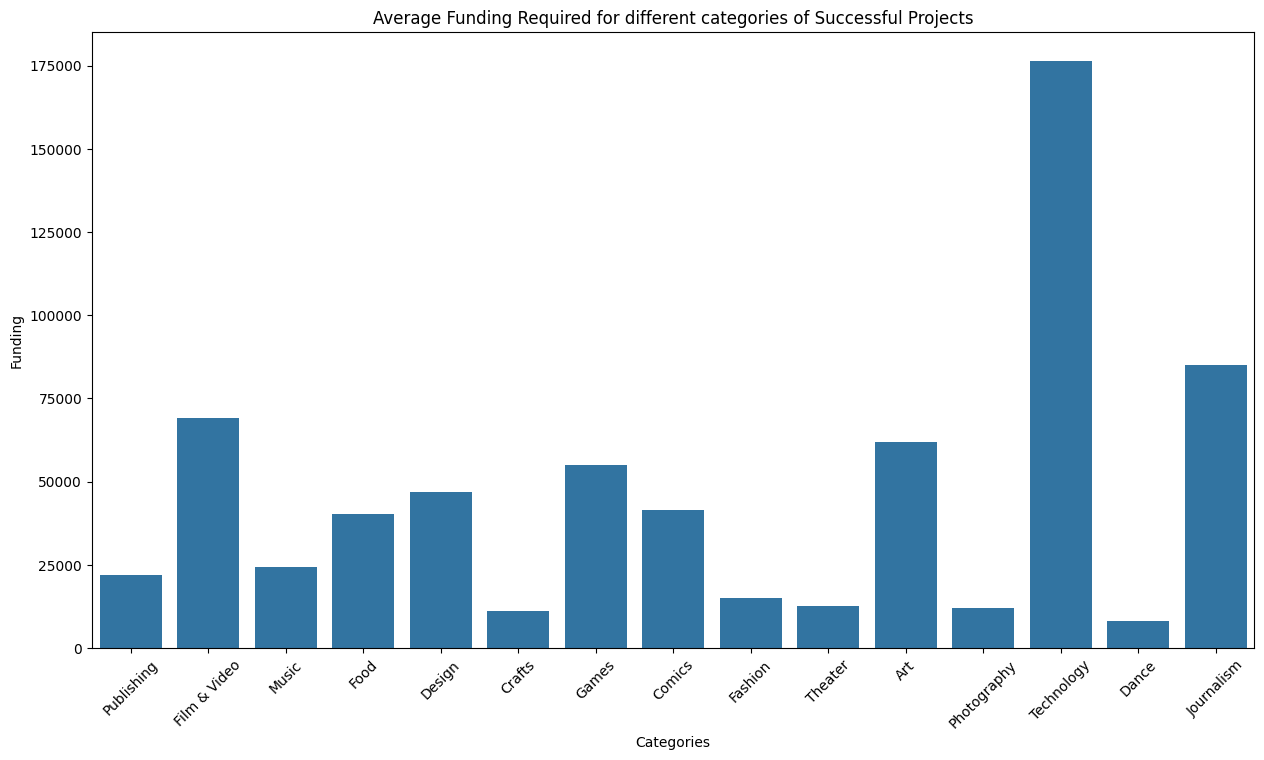

In [ ]:
# Below graph shows the mean funding required for different categories
plt.figure(1,(15,8))
sns.barplot(y = 'mean', x = goal_stat.T.index , data = goal_stat.T)
plt.title('Average Funding Required for different categories of Successful Projects')
plt.ylabel('Funding')
plt.xlabel('Categories')
_ = plt.xticks(rotation= 45)

In [ ]:
# Parsing the columns launched and deadline
df1 = df[['deadline','launched']]
for i in df1.columns:
    df1[i] =   pd.to_datetime(df1[i])
    df1[str(i) + '_date'] = df1[i].dt.date
    df[str(i)+ '_year'] = df1[i].dt.year
    df[str(i)+'_month'] = df1[i].dt.month
    df[str(i)+'_monthday'] = df1[i].dt.day
    df[str(i)+'_weekday'] = df1[i].dt.day_name()
    df[str(i)+ '_quarter'] = df1[i].dt.quarter


In [ ]:
df['state'].value_counts()

failed        121083
successful     82268
canceled       23755
undefined       2179
live            1710
suspended       1124
Name: state, dtype: int64

<Axes: xlabel='deadline_month', ylabel='count'>

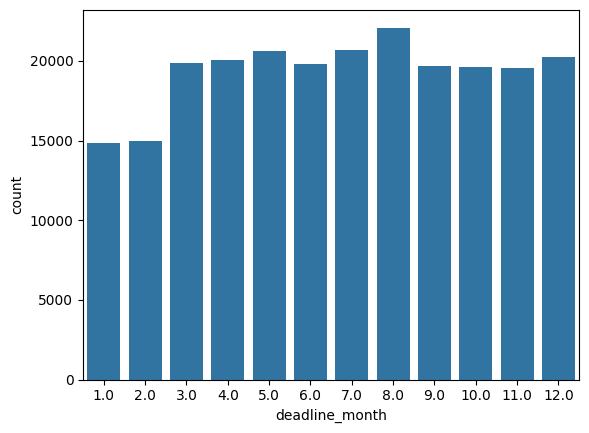

In [ ]:
sns.countplot(x = 'deadline_month', data = df)

<Axes: xlabel='launched_month', ylabel='count'>

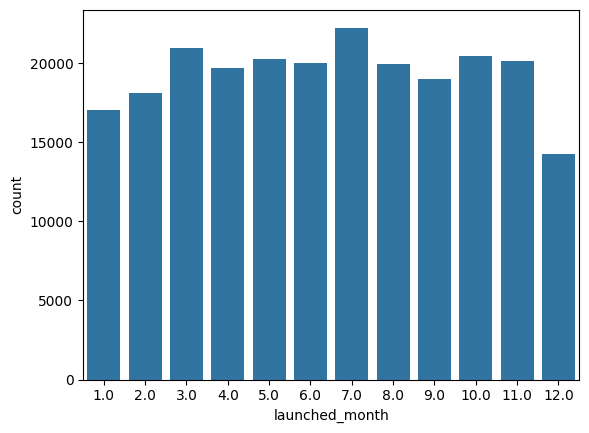

In [ ]:
sns.countplot(x = 'launched_month', data = df)

Text(0.5, 0, 'Months')

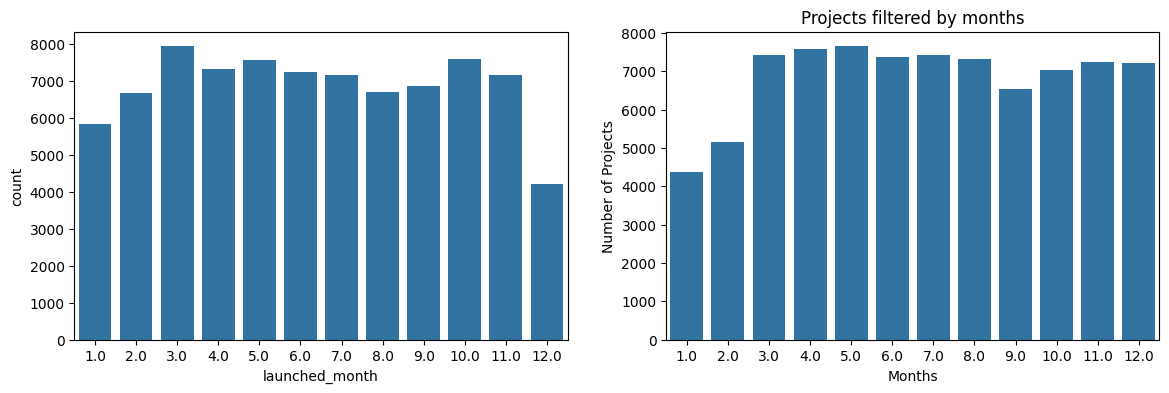

In [ ]:
# successfull projects launched and deadline month
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'successful']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_month', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_month', data = df3)
plt.title('Projects filtered by months')
plt.ylabel('Number of Projects')
plt.xlabel('Months')

<Axes: xlabel='deadline_month', ylabel='count'>

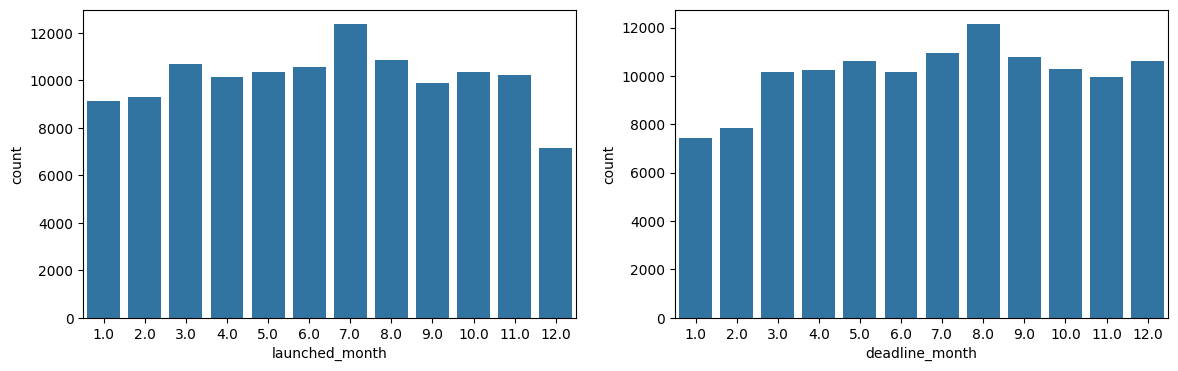

In [ ]:
# launched and deadline month for failed months. June and july seem to be having an high failure rate.
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'failed']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_month', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_month', data = df3)

<Axes: xlabel='deadline_weekday', ylabel='count'>

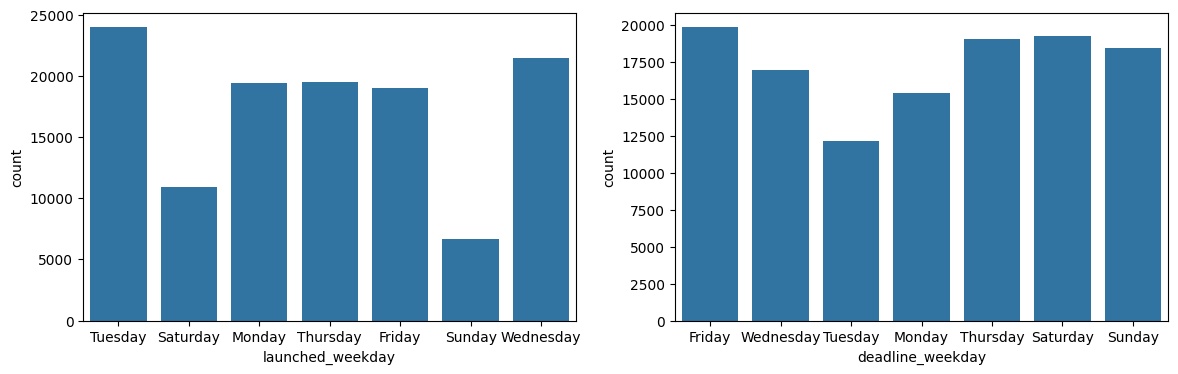

In [ ]:
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'failed']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_weekday', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_weekday', data = df3)

<Axes: xlabel='deadline_weekday', ylabel='count'>

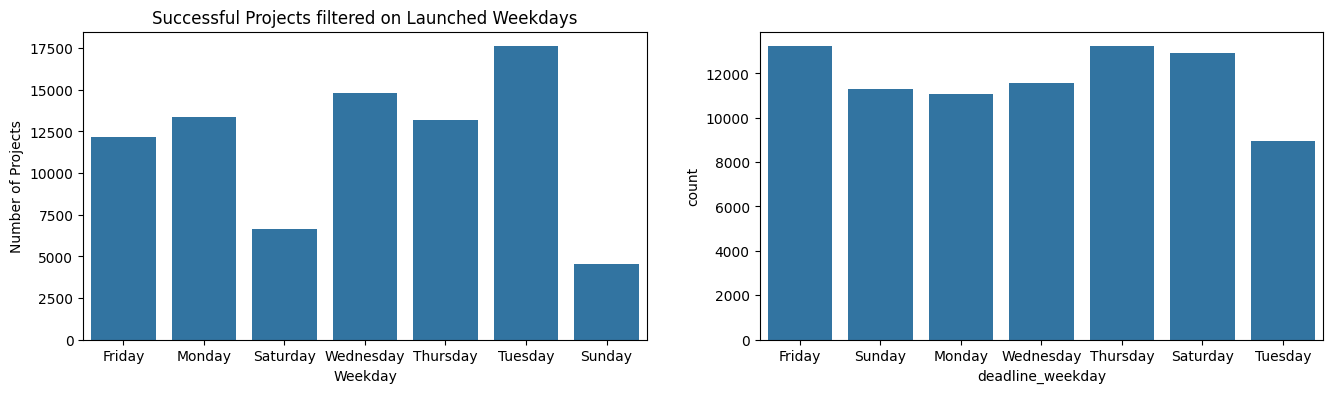

In [ ]:
fig = plt.figure(1, (16, 4))
df3 = df[df['state'] == 'successful']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_weekday', data = df3)
plt.title('Successful Projects filtered on Launched Weekdays')
plt.ylabel('Number of Projects')
plt.xlabel('Weekday')
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_weekday', data = df3)

In [ ]:
# counting the number of weekdays between quarters.
df['weekday_count'] = df1.apply(lambda x: np.busday_count(x.launched_date, x.deadline_date), axis=1)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
df.head(5)

In [ ]:
sns.barplot(x ='state',y='weekday_count',hue='deadline_month', data = df,ci=None)
plt.legend(ncol=3)

In [ ]:
len(df)

In [ ]:
df.drop(df['weekday_count'].idxmax(),inplace=True)

In [ ]:
df.loc[df['weekday_count'].idxmax()]

In [ ]:
df['weekday_count'].nlargest(10)

In [ ]:
df.nlargest(6,'weekday_count')


In [ ]:
df.drop(df['weekday_count'].nlargest(6).index,inplace=True)
#df['weekday_count'].idxmax(5)

In [ ]:
sns.barplot(x ='state',y='weekday_count', data = df,ci=None)
plt.legend(ncol=3)
plt.title('Weekdays between Project launch and deadline and State of Project')
plt.ylabel('Weekday count')
plt.xlabel('State of the Project')

In [ ]:
# Plotting successful projects by quarter
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'successful']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_quarter', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_quarter', data = df3)
plt.title('Projects filtered by Quarters')
plt.ylabel('Number of Projects')
plt.xlabel('Quarters')

In [ ]:
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'failed']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_quarter', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_quarter', data = df3)

In [ ]:
sns.countplot(x = 'deadline_quarter', data = df) # normally lesser projects are anouncced in the first quarter

In [ ]:
# Plotting project counts over the years
df9 = df[(df['state'] == "failed") | (df['state'] == "successful")]
df1 = df[['deadline','launched']]
for i in df1.columns:
    df1[i] =   pd.to_datetime(df1[i])
    df9[str(i) + '_date'] = df1[i].dt.date
    df9[str(i)+ '_year'] = df1[i].dt.year
df9 = df9.groupby('launched_year').count()

In [ ]:
sns.lineplot(y = df9['ID'], x = df9.index)
plt.title('Projects over the years')
plt.ylabel('Number of Projects')
plt.xlabel('Years')
df9

In [ ]:
9577/1179

In [ ]:
df3 = df.drop(['name','goal', 'pledged', 'usd pledged', 'deadline_year','deadline_month','deadline_monthday','deadline_quarter','launched_quarter','ID','deadline','launched', 'deadline_weekday','currency','category', 'launched_monthday','usd_pledged_real','backers'],axis=1)

In [ ]:
df3 = df3[(df3['state'] == "failed") | (df3['state'] == "successful")] # Taking only successful and failed states

In [ ]:
category = df3[['main_category','state','launched_year','launched_month','launched_weekday','country']]
numerical = df3[df3.columns.difference(['main_category','state','country','launched_year','launched_month','launched_weekday','country'])]

In [ ]:
numerical

In [ ]:
category

In [ ]:
y = category['state']
category = category.drop('state', axis=1)

In [ ]:
scale = preprocessing.scale(numerical)
scale = pd.DataFrame(scale,columns=numerical.columns, index = numerical.index)
scale

In [ ]:
category = category.astype(object)
category = pd.get_dummies(category)

In [ ]:
X = pd.concat([category, scale,], axis=1)

In [ ]:
y = y.astype(object)
y = pd.get_dummies(y,drop_first=True)
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [ ]:
regressors = [['LogisticRegressor',LogisticRegression()],
              ['KNeighboursClassifier',KNeighborsClassifier()],
              ['RandomForestClassifier', RandomForestClassifier()],
             ['BaggingClassifier',BaggingClassifier()],
             ['AdaboostClassifier',AdaBoostClassifier()]]
Acc = pd.DataFrame()

In [ ]:
for mod in regressors:
    name = mod[0]
    model = mod[1]

    model.fit(X_train,y_train)
    actr1 = accuracy_score(y_train, model.predict(X_train))
    acte1 = accuracy_score(y_test, model.predict(X_test))

    #Acc = Acc.append(pd.Series({'model':name, 'train_score':actr1,'test_score':acte1}),ignore_index=True )
    #new_df = pd.concat([new_df, pd.DataFrame([outliers])], ignore_index=True)
    Acc = pd.concat([Acc,pd.DataFrame([pd.Series({'model':name, 'train_score':actr1,'test_score':acte1})])],ignore_index=True )

In [ ]:
Acc

In [ ]:
# Using cv to check the best parameters for random forest classifier
params = {
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7],'n_estimators': [100,200,300,400,500]}
R = RandomizedSearchCV(RandomForestClassifier(),params,cv = 10,verbose=3,scoring='f1',n_jobs=-1)
R.fit(X_train,y_train)
R.best_estimator_

In [ ]:

RandomForestClassifier
RandomForestClassifier(max_depth=7, min_samples_split=9)

In [ ]:
best = RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=6,n_estimators=200)
best.fit(X_train,y_train)
accuracy_score(y_test, best.predict(X_test))

In [ ]:
best.feature_importances_

In [ ]:
# Getting feature importances
data = list(zip(X.columns, best.feature_importances_))
new_df = pd.DataFrame(data, columns =['Feature', 'Importance'])
new_df.sort_values(ascending=False,by = 'Importance')